# FOST--Predict States Energy Data

> State Energy Data Systems (SEDS) data for all US states, including DC, from 1960 to 2014F.</br> 
The data is a composition of the State Energy Data Systems (SEDS) data for all US states, including DC, from 2016 to 2014F, for data released June 29, 2016. It has been tidied from a wide format to a long format, and includes unit codes for the values associated with the observations for each MSN code for each state for each year.</br> 
Link: https://www.kaggle.com/nathanto/seds-1960-2014F

We are going to use FOST and states energy temporal and spatial data to predict next several years.

In [1]:
import fostool
from fostool.pipeline import Pipeline

# Download Data

You should have `FOST_example_data/Energy/graph.csv`,`FOST_example_data/Energy/train.csv` and `FOST_example_data/Turbine/train.csv` after running this block.

In [2]:
!wget -O Dataset.zip "https://onedrive.live.com/download?cid=4E3B5BF06F46DFD5&resid=4E3B5BF06F46DFD5%21461&authkey=ACK4NyYumsXm8IY"

!unzip Dataset.zip

--2021-11-11 14:01:25--  https://onedrive.live.com/download?cid=4E3B5BF06F46DFD5&resid=4E3B5BF06F46DFD5%21461&authkey=ACK4NyYumsXm8IY
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ife64g.dm.files.1drv.com/y4m41J1TZTZKXwLezz85NBSVDMW2c7UChD9doqRFaLZzQvc2o9-Ahq_mNTqFhZIUDuB3k7WCZ_k92xLita2m83sSkjVpo8CgtztWt1j04hei-YfmDxlHTrPCw1yPBlMeEehuCqOlQTP93D50XpTh-csf3oJ-nHJY7Wb72cXAfouoq6tsliDeVPlNH7MIcSYh2adMmf1zJN5myeWacpPYdxk6Q/FOST_example_data.zip?download&psid=1 [following]
--2021-11-11 14:01:26--  https://ife64g.dm.files.1drv.com/y4m41J1TZTZKXwLezz85NBSVDMW2c7UChD9doqRFaLZzQvc2o9-Ahq_mNTqFhZIUDuB3k7WCZ_k92xLita2m83sSkjVpo8CgtztWt1j04hei-YfmDxlHTrPCw1yPBlMeEehuCqOlQTP93D50XpTh-csf3oJ-nHJY7Wb72cXAfouoq6tsliDeVPlNH7MIcSYh2adMmf1zJN5myeWacpPYdxk6Q/FOST_example_data.zip?download&psid=1
Resolving ife64g.dm.files.1drv.com (ife64g.

# Preparing Data

Load the training data and graph data from the .csv file.

In [3]:
train_path = 'FOST_example_data/Energy/train.csv'
graph_path = 'FOST_example_data/Energy/graph.csv'
#predict for next 5 years
lookahead = 5

In [4]:
import pandas as pd
pd.read_csv(train_path).head()

,Unnamed: 0,Node,Date,TARGET
0,0,Alaska,1960-01-01,800592.0
1,1,Alaska,1961-01-01,933600.0
2,2,Alaska,1962-01-01,1013979.0
3,3,Alaska,1963-01-01,1046760.0
4,4,Alaska,1964-01-01,1100728.0


In [5]:
pd.read_csv(graph_path).head()

,Unnamed: 0,node_0,node_1,weight
0,0,Alabama,Arkansas,0.074517
1,1,Alabama,Florida,0.075873
2,2,Alabama,Georgia,0.155103
3,3,Alabama,Illinois,0.054406
4,4,Alabama,Indiana,0.056332


# Create Pipeline

Create Pipeline and preprocess training data, you are encouraged to change params like `lookahead`.

In [6]:
fost = Pipeline(lookahead=lookahead, train_path=train_path, graph_path=graph_path)

2021-11-11 14:15:14 fostool/task/config_handler.py 26 \ - INFO - yaml handler load path: /home/xiaofan/anaconda3/envs/test/lib/python3.8/site-packages/fostool/config/default.yaml
2021-11-11 14:15:15 fostool/dataset/data_utils.py 402 \ - INFO - Detected Sample Frequency: <DateOffset: years=1>.
2021-11-11 14:15:15 fostool/dataset/data_utils.py 426 \ - INFO - 2805 Rows Before Time Reindex.
2021-11-11 14:15:15 fostool/dataset/data_utils.py 428 \ - INFO - 2805 Rows After Time Reindex.
2021-11-11 14:15:15 fostool/dataset/data_utils.py 429 \ - INFO - --------------------
2021-11-11 14:15:15 fostool/dataset/data_utils.py 457 \ - INFO - 2805 Rows Before Fill Missing.
2021-11-11 14:15:15 fostool/dataset/data_utils.py 461 \ - INFO - 2805 Rows After Fill Missing.
2021-11-11 14:15:15 fostool/dataset/data_utils.py 462 \ - INFO - --------------------


# Training

Train the models that fit your data.

In [7]:
fost.fit()

2021-11-11 14:15:19 fostool/tools/trainer.py 128 \ - INFO - On epoch 0, train loss 0.5394601225852966, val loss 0.7979480028152466
2021-11-11 14:15:19 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:19 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_3164_7, current best val loss 0.7979480028152466
2021-11-11 14:15:19 fostool/tools/trainer.py 128 \ - INFO - On epoch 1, train loss 0.4595740536848704, val loss 0.663418710231781
2021-11-11 14:15:19 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:19 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_3164_7, current best val loss 0.663418710231781
2021-11-11 14:15:19 fostool/tools/trainer.py 128 \ - INFO - On epoch 2, train loss 0.41446834802627563, val loss 0.5555686354637146
2021-11-11 14:15:19 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:19 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_3164_7, current best val loss 0.5555686354637146
20

2021-11-11 14:15:21 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:21 fostool/tools/trainer.py 128 \ - INFO - On epoch 30, train loss 0.15604684750239053, val loss 0.18524982035160065
2021-11-11 14:15:21 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:21 fostool/tools/trainer.py 128 \ - INFO - On epoch 31, train loss 0.15209218859672546, val loss 0.18770956993103027
2021-11-11 14:15:21 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:21 fostool/tools/trainer.py 128 \ - INFO - On epoch 32, train loss 0.1536823312441508, val loss 0.20137137174606323
2021-11-11 14:15:21 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:21 fostool/tools/trainer.py 128 \ - INFO - On epoch 33, train loss 0.15817637741565704, val loss 0.20276322960853577
2021-11-11 14:15:21 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:21 fostool/tools/trainer.py 128 \ - INFO - On epoch 34, train loss 0.15042136609554

2021-11-11 14:15:25 fostool/tools/trainer.py 128 \ - INFO - On epoch 1, train loss 0.3949432671070099, val loss 0.27110227942466736
2021-11-11 14:15:25 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:25 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_b4d0_7, current best val loss 0.27110227942466736
2021-11-11 14:15:25 fostool/tools/trainer.py 128 \ - INFO - On epoch 2, train loss 0.33222198486328125, val loss 0.2399486005306244
2021-11-11 14:15:25 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:25 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_b4d0_7, current best val loss 0.2399486005306244
2021-11-11 14:15:25 fostool/tools/trainer.py 128 \ - INFO - On epoch 3, train loss 0.31109825770060223, val loss 0.208534374833107
2021-11-11 14:15:25 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:25 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_b4d0_7, current best val loss 0.208534374833107
2021-

2021-11-11 14:15:27 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:27 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_c234_14, current best val loss 0.3543141186237335
2021-11-11 14:15:27 fostool/tools/trainer.py 128 \ - INFO - On epoch 13, train loss 0.3223126232624054, val loss 0.33156681060791016
2021-11-11 14:15:27 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:27 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_c234_14, current best val loss 0.33156681060791016
2021-11-11 14:15:27 fostool/tools/trainer.py 128 \ - INFO - On epoch 14, train loss 0.3085220009088516, val loss 0.3110785484313965
2021-11-11 14:15:27 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:27 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_c234_14, current best val loss 0.3110785484313965
2021-11-11 14:15:27 fostool/tools/trainer.py 128 \ - INFO - On epoch 15, train loss 0.2941538691520691, val loss 0.2926771640

2021-11-11 14:15:28 fostool/tools/trainer.py 128 \ - INFO - On epoch 38, train loss 0.14986146986484528, val loss 0.12019504606723785
2021-11-11 14:15:28 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:28 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_c234_14, current best val loss 0.12019504606723785
2021-11-11 14:15:28 fostool/tools/trainer.py 128 \ - INFO - On epoch 39, train loss 0.1490846760571003, val loss 0.11929481476545334
2021-11-11 14:15:28 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:28 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_c234_14, current best val loss 0.11929481476545334
2021-11-11 14:15:28 fostool/tools/trainer.py 128 \ - INFO - On epoch 40, train loss 0.14672011137008667, val loss 0.12148523330688477
2021-11-11 14:15:28 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:28 fostool/tools/trainer.py 128 \ - INFO - On epoch 41, train loss 0.14542733132839203, val loss 0.12

2021-11-11 14:15:31 fostool/tools/trainer.py 128 \ - INFO - On epoch 17, train loss 0.16792144626379013, val loss 0.14602099359035492
2021-11-11 14:15:31 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:31 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_b2aa_14, current best val loss 0.14602099359035492
2021-11-11 14:15:31 fostool/tools/trainer.py 128 \ - INFO - On epoch 18, train loss 0.17501761764287949, val loss 0.14043864607810974
2021-11-11 14:15:31 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:31 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_b2aa_14, current best val loss 0.14043864607810974
2021-11-11 14:15:31 fostool/tools/trainer.py 128 \ - INFO - On epoch 19, train loss 0.15896540880203247, val loss 0.13558267056941986
2021-11-11 14:15:31 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:31 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_b2aa_14, current best val

2021-11-11 14:15:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:34 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_5eb1_14, current best val loss 0.16471993923187256
2021-11-11 14:15:34 fostool/tools/trainer.py 128 \ - INFO - On epoch 10, train loss 0.20276767015457153, val loss 0.16127751767635345
2021-11-11 14:15:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:34 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_5eb1_14, current best val loss 0.16127751767635345
2021-11-11 14:15:34 fostool/tools/trainer.py 128 \ - INFO - On epoch 11, train loss 0.1937788724899292, val loss 0.15597397089004517
2021-11-11 14:15:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:34 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_5eb1_14, current best val loss 0.15597397089004517
2021-11-11 14:15:34 fostool/tools/trainer.py 128 \ - INFO - On epoch 12, train loss 0.1868366375565529, val loss 0.144442752003

2021-11-11 14:15:36 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:36 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_5c90_21, current best val loss 0.6172938346862793
2021-11-11 14:15:36 fostool/tools/trainer.py 128 \ - INFO - On epoch 11, train loss 0.4704024940729141, val loss 0.6018126010894775
2021-11-11 14:15:36 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:36 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_5c90_21, current best val loss 0.6018126010894775
2021-11-11 14:15:36 fostool/tools/trainer.py 128 \ - INFO - On epoch 12, train loss 0.4755554646253586, val loss 0.5920253992080688
2021-11-11 14:15:36 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:36 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_5c90_21, current best val loss 0.5920253992080688
2021-11-11 14:15:36 fostool/tools/trainer.py 128 \ - INFO - On epoch 13, train loss 0.4673824906349182, val loss 0.580031633377

2021-11-11 14:15:37 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:37 fostool/tools/trainer.py 128 \ - INFO - On epoch 37, train loss 0.12095645442605019, val loss 0.21771851181983948
2021-11-11 14:15:37 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:37 fostool/tools/trainer.py 128 \ - INFO - On epoch 38, train loss 0.11944562941789627, val loss 0.2139943242073059
2021-11-11 14:15:37 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:37 fostool/tools/trainer.py 128 \ - INFO - On epoch 39, train loss 0.1132764033973217, val loss 0.2060302346944809
2021-11-11 14:15:37 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:38 fostool/tools/trainer.py 128 \ - INFO - On epoch 40, train loss 0.11504939571022987, val loss 0.21019762754440308
2021-11-11 14:15:38 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:38 fostool/tools/trainer.py 128 \ - INFO - On epoch 41, train loss 0.1130558401346206

2021-11-11 14:15:41 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:41 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_ff1a_21, current best val loss 0.12965363264083862
2021-11-11 14:15:41 fostool/tools/trainer.py 128 \ - INFO - On epoch 21, train loss 0.09823064506053925, val loss 0.1291753202676773
2021-11-11 14:15:41 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:41 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_ff1a_21, current best val loss 0.1291753202676773
2021-11-11 14:15:41 fostool/tools/trainer.py 128 \ - INFO - On epoch 22, train loss 0.10100039467215538, val loss 0.13323839008808136
2021-11-11 14:15:41 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:41 fostool/tools/trainer.py 128 \ - INFO - On epoch 23, train loss 0.09880898147821426, val loss 0.12909503281116486
2021-11-11 14:15:42 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:42 fostool/tools/trai

2021-11-11 14:15:45 fostool/tools/trainer.py 128 \ - INFO - On epoch 8, train loss 0.23259367793798447, val loss 0.20851270854473114
2021-11-11 14:15:45 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:45 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c5cf_21, current best val loss 0.20851270854473114
2021-11-11 14:15:45 fostool/tools/trainer.py 128 \ - INFO - On epoch 9, train loss 0.21439716219902039, val loss 0.18368573486804962
2021-11-11 14:15:45 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:45 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c5cf_21, current best val loss 0.18368573486804962
2021-11-11 14:15:45 fostool/tools/trainer.py 128 \ - INFO - On epoch 10, train loss 0.19818440824747086, val loss 0.166077122092247
2021-11-11 14:15:45 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:45 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c5cf_21, current best val loss 0.16607712209224

2021-11-11 14:15:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:46 fostool/tools/trainer.py 128 \ - INFO - On epoch 35, train loss 0.09749258682131767, val loss 0.09904992580413818
2021-11-11 14:15:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:46 fostool/tools/trainer.py 128 \ - INFO - On epoch 36, train loss 0.09478767961263657, val loss 0.09650077670812607
2021-11-11 14:15:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:46 fostool/tools/trainer.py 128 \ - INFO - On epoch 37, train loss 0.09311595559120178, val loss 0.09450780600309372
2021-11-11 14:15:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-11 14:15:46 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c5cf_21, current best val loss 0.09450780600309372
2021-11-11 14:15:46 fostool/tools/trainer.py 128 \ - INFO - On epoch 38, train loss 0.09231722727417946, val loss 0.09557486325502396
2021-11-11 14:15:46 fostool/tools/trainer.p

# Predict

Predict results using the models trained in the previous step.

In [9]:
result = fost.predict()

2021-11-10 16:16:06 fostool/task/fusion.py 67 \ - INFO -    val_loss            model_name
5  0.099834       MLP_Res_c5cf_21
6  0.125119  SandwichModel_a54c_7


# Plot

Display of predicted data.

You are encouraged to change params like `node_name`.

2021-11-10 16:16:06 fostool/visualizer/plot.py 66 \ - INFO - Unspecified lookback_size, use default lookback_size: 25.


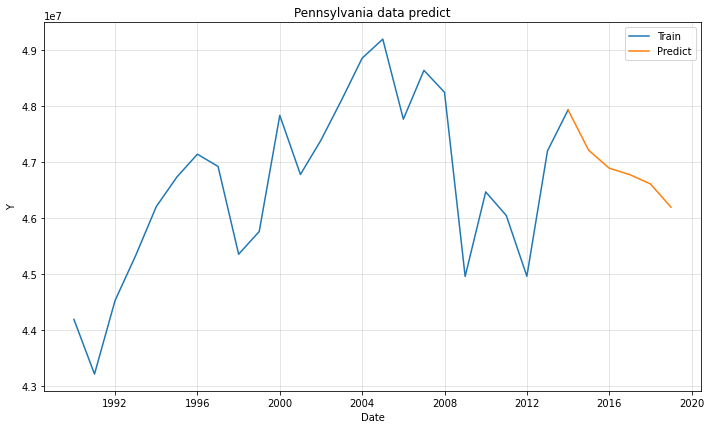

In [10]:
fost.plot(result, node_name='Pennsylvania')